In [8]:
import numpy as np; import pylab as pl; import os, time, pickle; import matplotlib.pyplot as plt
ITD_limit = 160
stim_no = 11
stim_range = np.arange(-ITD_limit, ITD_limit, 2*ITD_limit/stim_no)
N = 1000
simtime = 1*1000.
t_trans = 150.
f = open('po_init', 'rb'); pitds = pickle.load(f); f.close()
po_init=pitds

n_cores = 4
trial_no = 10

In [9]:
def pega_resultados(raiz, stim, core):
    bloco = []
    #print(trial)
    #file = np.loadtxt(f"../SpecNet-master/Results/N1000g10.0_FS_[1, 0, 0, 0]_Mod0.0/spikes-all-st{i}-tr0-2050-0.gdf", skiprows=3)
    file = np.loadtxt(raiz.format(core=core, stim=stim), skiprows=3)
    bloco.append(file[:,0])
    
    return np.concatenate(bloco)


def generate_TC(raiz):
    tc = []
    for st in range(len(stim_range)):
        fr = np.zeros(N)
        senders = []
        for core in range(n_cores):
            senders.append(pega_resultados(raiz, st, core))
        senders = np.concatenate(senders)
        fr = np.array([len(np.where(senders == n)[0]) / ((simtime-t_trans)/1000) for n in range(1,N+1)])
        tc.append(fr)

    return np.array(tc)

def plot_TC(tc, neurons, label=po_init):
    for neuron in neurons:
        plt.plot(stim_range[:], tc[:,neuron], 'o-', label=round(label[neuron],1))
        plt.xlabel("ITD Estimulo (ms)")
        plt.ylabel("Taxa de disparo (spike/s)")
    plt.legend(bbox_to_anchor=(1.25,1))

In [10]:
tcs = []

for tr in range(trial_no+1):
    raiz = 'Results/N1000g8/spikes-all-st{stim}-tr'+str(tr)+'-1001-{core}.dat'
    tr = generate_TC(raiz)
    tcs.append(tr)
    

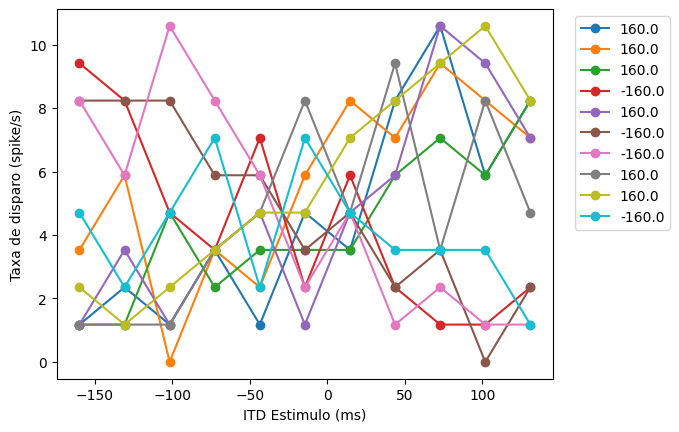

In [11]:
plot_TC(tcs[2], range(10))

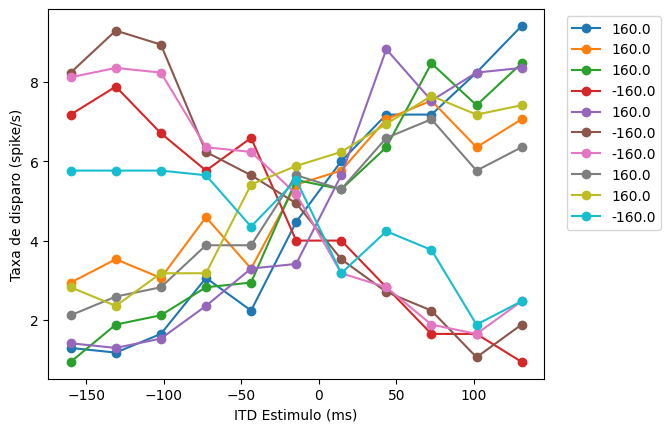

In [12]:
number = 10
tc_mean_sample = np.mean(tcs[:number], axis = 0)
plot_TC(tc_mean_sample, range(number))

In [13]:
tc_mean = np.mean(tcs, axis=0)

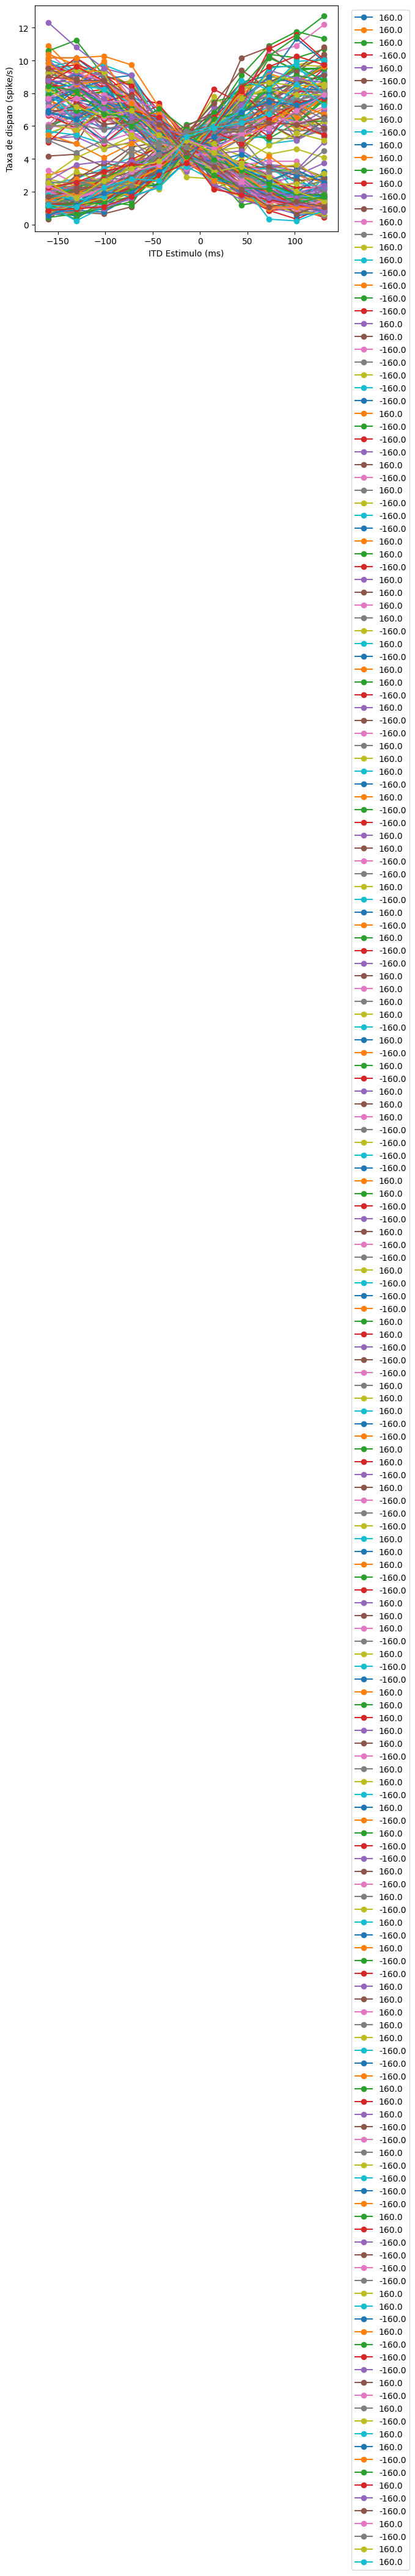

In [15]:
plot_TC(tc_mean, range(0,200))

In [16]:
po_output = []
for n in range(N):
    poo = list(tc_mean[:,n]).index(max(tc_mean[:,n]))
    po_output.append(np.mean(stim_range[poo]))

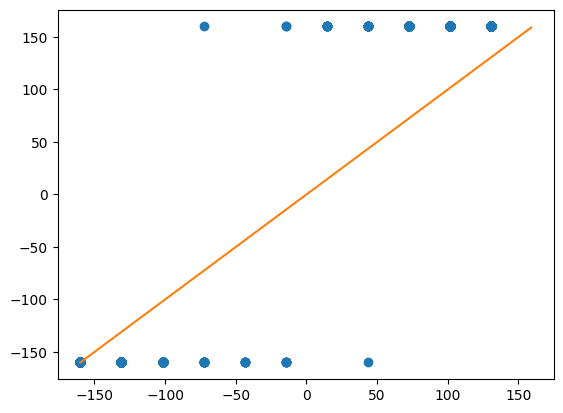

In [17]:
x = po_init
y = stim_range[np.argmax(tc_mean, axis=0)]
plt.plot(y, x, "o")
plt.plot(np.arange(-160,160), np.arange(-160,160))

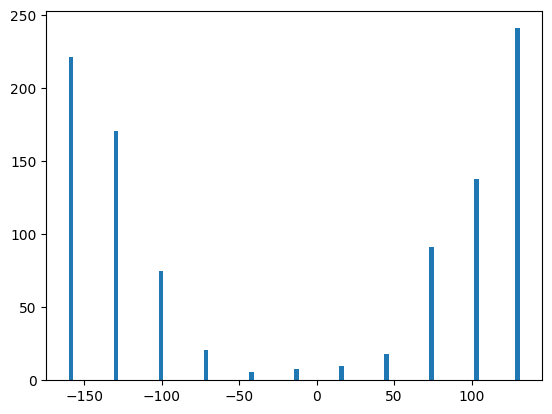

In [18]:
plt.hist(np.array(po_output), bins = 100);

In [19]:
po_output = np.array(po_output)

In [20]:
po_middle = np.where((po_output > -50) & (po_output < 50))

In [21]:
po_middle

(array([ 15,  31,  34,  59,  61,  68,  77, 115, 135, 141, 163, 197, 202,
        212, 234, 260, 286, 288, 363, 383, 408, 415, 446, 450, 453, 456,
        462, 482, 519, 570, 572, 586, 605, 625, 663, 692, 693, 710, 725,
        800, 901, 914]),)

In [22]:
# plot_TC(tc_mean,po_middle[0], po_output)

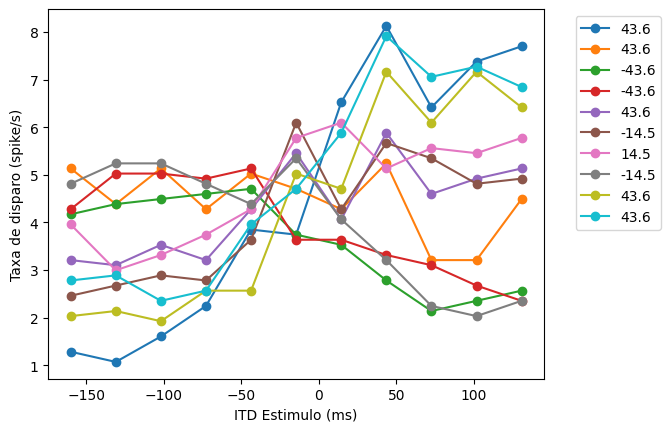

In [24]:
plot_TC(tc_mean,po_middle[0][10:20], po_output)

In [25]:
np.shape(po_middle)

(1, 42)

In [26]:
b = np.argsort(po_output)

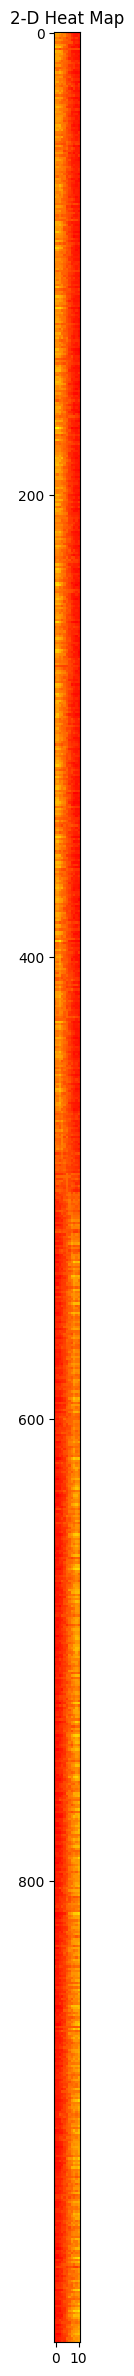

In [27]:
plt.figure(figsize=(30,30))
plt.imshow(tc_mean.T[b], cmap = 'autumn' , interpolation = 'nearest')
plt.title( "2-D Heat Map" )
plt.show()

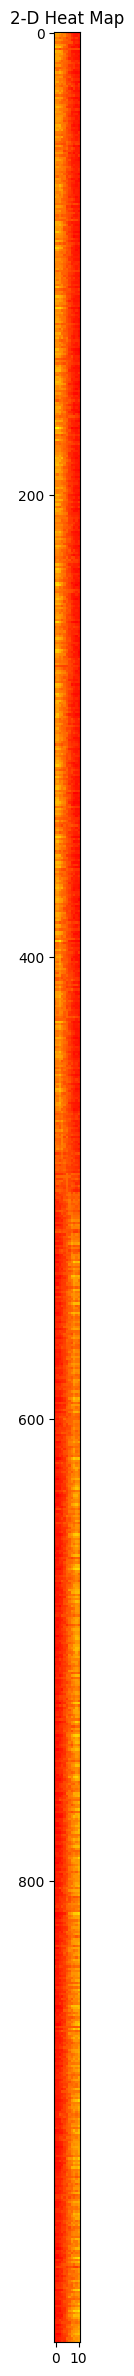

In [28]:
plt.figure(figsize=(30,30))
plt.imshow(tc_mean.T[b], cmap = 'autumn' , interpolation = 'nearest')
plt.title( "2-D Heat Map" )
plt.show()